## Code for study results and visuals

#### Get adjacency matrix

In [19]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import networkx as nx
import symmetrizations as symm
from sklearn.cluster import SpectralClustering

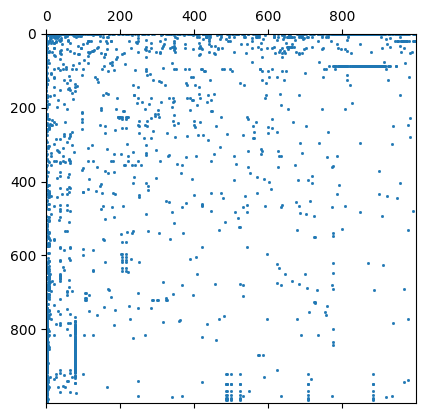

In [11]:
adjacency_matrix = symm.normalize_adj(np.load('./../data/postprocessing/adjacency.npy'))
plt.spy(adjacency_matrix, markersize=1)

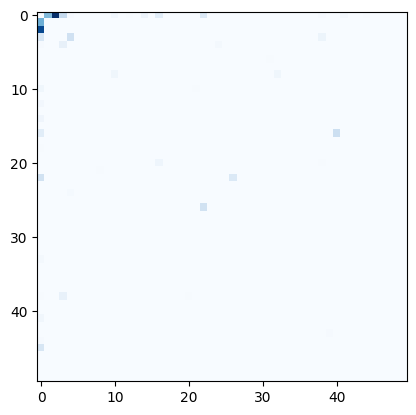

In [12]:
plt.imshow(adjacency_matrix[:50, :50], cmap='Blues')

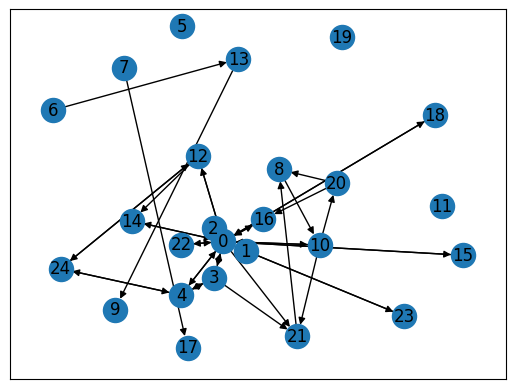

In [16]:
#show graph of first 100 nodes
graph = nx.from_numpy_array(adjacency_matrix[:25, :25], create_using=nx.DiGraph)
nx.draw_networkx(graph)

### Naive Transform

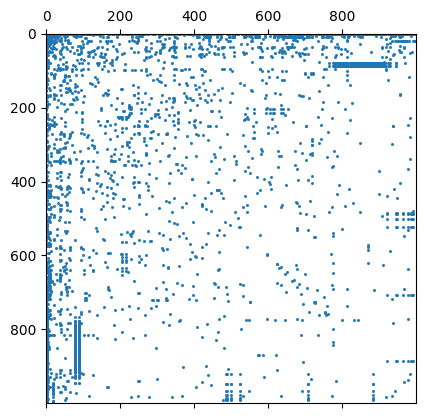

In [17]:
A_nt = symm.naive_transform(adjacency_matrix)
plt.spy(A_nt, markersize=1)

In [ ]:
model_nt = SpectralClustering(8, affinity='precomputed').fit(A_nt)
clusters_nt = model_nt.labels_